<a href="https://colab.research.google.com/github/Dario-Maglio/Numerical_Methods/blob/main/Application_projects/Ising_model_2D/interface_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Colab interface for the Ising 2D simulation



#Get started

Import python packages

In [4]:
import os 

import numpy as np 
import matplotlib.pyplot as plt

import multiprocessing as mp

Clone the repository and change the current directory

In [ ]:
!git clone https://github.com/Dario-Maglio/Numerical_methods.git
%cd Numerical_methods/Application_projects/Ising_model_2D/

Body of the work
================

Execute programs

In [ ]:
!g++ ising_lattice.h ising_main.cpp -o main.out
!./main.out

I'm thinking about starting one process for each file. In this way, we may exectute the simulation faster.

In [ ]:
proc = mp.Pool(processes=7)
results = proc.map(target_function, Iterator_of_arguments)
print(results)

output = mp.Queue()
# Setup a list of processes that we want to run
processes = [mp.Process(target=target_function, args=(Arguments)) for Arguments in range(10)]
# Run processes
for p in processes:
    p.start()
# Exit the completed processes
for p in processes:
    p.join()
# Get process results from the output queue
results = [output.get() for p in processes]
print(results)

Analysis of the output file for eache side in a row, to get control on the error

In [7]:
!g++ data_analysis.cpp -o data.out
!./data.out

Insert side lenght: 20


Creating file: Side_20/averages_and_variance.dat

side: 20 | beta: 0.36
20 0.36 --- energy error: 
logging: k steps 1 -> -0.920517 ± 0.0007796
logging: k steps 2 -> -0.920518 ± 0.000852539
logging: k steps 3 -> -0.920517 ± 0.000891762
logging: k steps 4 -> -0.920518 ± 0.000907448
logging: k steps 5 -> -0.920517 ± 0.000922947
logging: k steps 6 -> -0.920501 ± 0.000938391
logging: k steps 7 -> -0.920501 ± 0.000966586
20 0.36 --- magnet error: 
logging: k steps 1 -> 0.174598 ± 0.00113822
logging: k steps 2 -> 0.174598 ± 0.0013977
logging: k steps 3 -> 0.174598 ± 0.00160783
logging: k steps 4 -> 0.174598 ± 0.00175054
logging: k steps 5 -> 0.174598 ± 0.00179928
logging: k steps 6 -> 0.174574 ± 0.00184114
logging: k steps 7 -> 0.174574 ± 0.00178288
20 0.36 --- heat error: 
logging: correl lenght 25 -> 0.010156 ± 0.000114414
logging: correl lenght 33 -> 0.0101525 ± 0.000115308
logging: correl lenght 44 -> 0.0101513 ± 0.000104038
logging: correl lenght 58 -> 0.0101575 

In the end
==========

Make plots of energy and magnetization (uno accanto all'altro)

Loading directory Side_20
Loading directory Side_30
Loading directory Side_40
Loading directory Side_50
Loading directory Side_60

 Plots of energy and magnetization: 



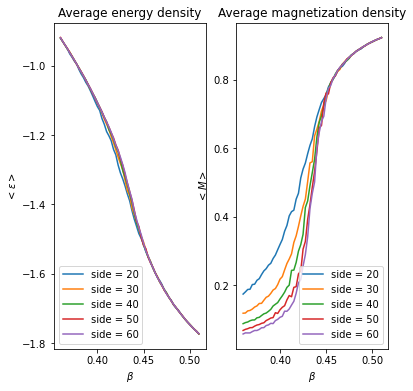

In [17]:
fig, axes = plt.subplots(1, 2, num="energy and magnetization", figsize=(6, 6))

axes[0].set_title("Average energy density")
axes[0].set_ylabel(r'$< \epsilon >$')
axes[0].set_xlabel(r'$\beta$')

axes[1].set_title("Average magnetization density")
axes[1].set_ylabel(r'$< M >$')
axes[1].set_xlabel(r'$\beta$')
    
sides = np.arange(20, 61, 10, dtype='int')
betas = np.arange(0.3600, 0.5101, 0.0025, dtype='float')

for side in sides:
    ene = []
    mag = []

    directory = f"Side_{side}"
    print("Loading directory " + directory)

    for beta in betas:
        filename = "side_{0}_beta_{1:.6f}.dat".format(side, beta)
        file = os.path.join(directory, filename)

        if os.path.isfile(file):
            x, y = np.loadtxt(file, unpack='True')
            ene.append(np.mean(x))
            mag.append(np.mean(abs(y)))

    axes[0].plot(betas, ene, label=f'side = {side}')

    axes[1].plot(betas, mag, label=f'side = {side}')

print("\n Plots of energy and magnetization: \n")
axes[0].legend(loc='lower left')
axes[1].legend(loc='lower right')
plt.show()

At last, remove things you don't need anymore and move to the main directory

In [ ]:
%cd ../..

#Push to GitHub

In [ ]:
!git pull          # update your local version of the repository

In [ ]:
!git status        # check the changes you made to your local version of the repository

In [ ]:
!git add .         # add the changes that you want to save, to the commit list 

In [ ]:
# Anna
!git config user.email "nanacaliendo@gmail.com"
!git config user.name  "Melanna7"

# Dario
#!git config user.email "cafasso.dario@gmail.com"
#!git config user.name  "Dario_Maglio"

In [ ]:
!git commit -m "implemented bootstrap and blocking algorithm in ising 2D"    # save changes in your local version of the repository

In [ ]:
# Generate the <TOKEN> in Profile/Setting/Developer_setting/Personal_access_token
!git push https://Dario-Maglio:<TOKEN>@github.com/Dario-Maglio/Numerical_Methods.git  # save changes on GitHub